### Syeda Samah Daniyal, 07838

In [96]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext, SparkSession

# sc is the Spark Context already available at databricks, so we do not need to create it again.
# sc = SparkContext()
# sqlContext = SQLContext(sc)

# from pyspark.sql import SparkSession
sqlContext = SparkSession.builder.appName('abc').getOrCreate()

# Creating RDD (Resilient Distributed Dataset) - fundamental data structure of Spark

In [97]:
products = sc.textFile("SalesData.txt")

In [98]:
products.first()

'ProductID\tName\tProductNumber\tColor\tStandardCost\tListPrice\tSize\tWeight\tProductCategoryID\tProductModelID\tSellStartDate\tSellEndDate\tDiscontinuedDate\tThumbNailPhoto\tThumbnailPhotoFileName\trowguid\tModifiedDate'

In [99]:
print("The data has {} columns".format(len(products.first().split("\t"))))
header = products.first().split("\t")
header

The data has 17 columns


['ProductID',
 'Name',
 'ProductNumber',
 'Color',
 'StandardCost',
 'ListPrice',
 'Size',
 'Weight',
 'ProductCategoryID',
 'ProductModelID',
 'SellStartDate',
 'SellEndDate',
 'DiscontinuedDate',
 'ThumbNailPhoto',
 'ThumbnailPhotoFileName',
 'rowguid',
 'ModifiedDate']

In [100]:
head = products.first()
content = products.filter(lambda line: line != head)

In [101]:
content.first()

'680\tHL Road Frame - Black, 58\tFR-R92B-58\tBlack\t1059.31\t1431.50\t58\t1016.04\t18\t6\t1998-06-01 00:00:00.000\tNULL\tNULL\t0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000\tno_image_available_small.gif\t43DD68D6-14A4-461F-9069-55309D90EA7E\t2004-03-11 10:01:36.827'

In [102]:
content.map(lambda line: len(line.split("\t"))).distinct().collect()[0]

17

# Example of RDD using Scala

In [103]:
rdd1 = (content.filter(lambda line: line.split("\t"))
 .map(lambda line: (line.split("\t")))
)
rdd1.take(1)

[['680',
  'HL Road Frame - Black, 58',
  'FR-R92B-58',
  'Black',
  '1059.31',
  '1431.50',
  '58',
  '1016.04',
  '18',
  '6',
  '1998-06-01 00:00:00.000',
  'NULL',
  'NULL',
  '0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
  'no_image_available_small.gif',
  '43DD68D6-14A4-461F-9069-55309D90EA7E',
  '2004-03-11 10:01:36.827']]

# Converting RDD into Spark Dataframe

In [104]:
df = rdd1.toDF(header)
df.show()

+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|ProductID|                Name|ProductNumber|Color|StandardCost|ListPrice|Size| Weight|ProductCategoryID|ProductModelID|       SellStartDate|         SellEndDate|DiscontinuedDate|      ThumbNailPhoto|ThumbnailPhotoFileName|             rowguid|        ModifiedDate|
+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|      680|HL Road Frame - B...|   FR-R92B-58|Black|     1059.31|  1431.50|  58|1016.04|               18|             6|1998-06-01 00:00:...|                NULL|            NULL|0x474946383961500..

# Using Two Different Code/Syntax
## Spark Dataframe syntax and SQL Table syntax

### Spark Dataframe syntax

In [105]:
# selecting two columns Name and Weight from original dataframe and convert into their proper datatype. Default is string
spark_df = df.select(df.Name, df.Weight.cast("float"))
spark_df.show(5, truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |NULL   |
|Sport-100 Helmet, Black  |NULL   |
|Mountain Bike Socks, M   |NULL   |
+-------------------------+-------+
only showing top 5 rows



### SQL Table syntax
First convert the original Spark Dataframe df into SQL Table and then write SQL syntax

In [106]:
# convert the original Spark Dataframe df into SQL Table
df.createOrReplaceTempView("df_table")
# write SQL query syntax
sqlContext.sql(" SELECT Name, cast(Weight as float) FROM df_table limit 5").show(truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |NULL   |
|Sport-100 Helmet, Black  |NULL   |
|Mountain Bike Socks, M   |NULL   |
+-------------------------+-------+



## Write your solutions using Spark Dataframe syntax and Spark SQL syntax. Your output should match with the RDD output

#### 1. Find the names and weight of the top 15 products by weight. Sort weight by descending order.

##### Using RDD

In [107]:
(content.filter(lambda line: line.split("\t")[7] != "NULL")
 .map(lambda line: (line.split("\t")[1], float(line.split("\t")[7])))
                     .takeOrdered(15, lambda x : -x[1])
                    )

[('Touring-3000 Blue, 62', 13607.7),
 ('Touring-3000 Yellow, 62', 13607.7),
 ('Touring-3000 Blue, 58', 13562.34),
 ('Touring-3000 Yellow, 58', 13512.45),
 ('Touring-3000 Blue, 54', 13462.55),
 ('Touring-3000 Yellow, 54', 13344.62),
 ('Touring-3000 Yellow, 50', 13213.08),
 ('Touring-3000 Blue, 50', 13213.08),
 ('Touring-3000 Yellow, 44', 13049.78),
 ('Touring-3000 Blue, 44', 13049.78),
 ('Mountain-500 Silver, 52', 13008.96),
 ('Mountain-500 Black, 52', 13008.96),
 ('Mountain-500 Silver, 48', 12891.03),
 ('Mountain-500 Black, 48', 12891.03),
 ('Mountain-500 Silver, 44', 12759.49)]

##### Using Spark DataFrame

In [108]:
spark_df = df.select(df.Name, df.Weight.cast("float"))

# filtering non-null weights, order by descending weight, and fetch the top 15
top_records = (
    spark_df.filter(spark_df.Weight.isNotNull())
                .orderBy(spark_df.Weight.desc())
                .limit(15)
)

top_records.show(truncate=False)

+-----------------------+--------+
|Name                   |Weight  |
+-----------------------+--------+
|Touring-3000 Yellow, 62|13607.7 |
|Touring-3000 Blue, 62  |13607.7 |
|Touring-3000 Blue, 58  |13562.34|
|Touring-3000 Yellow, 58|13512.45|
|Touring-3000 Blue, 54  |13462.55|
|Touring-3000 Yellow, 54|13344.62|
|Touring-3000 Yellow, 50|13213.08|
|Touring-3000 Blue, 50  |13213.08|
|Touring-3000 Yellow, 44|13049.78|
|Touring-3000 Blue, 44  |13049.78|
|Mountain-500 Silver, 52|13008.96|
|Mountain-500 Black, 52 |13008.96|
|Mountain-500 Silver, 48|12891.03|
|Mountain-500 Black, 48 |12891.03|
|Mountain-500 Silver, 44|12759.49|
+-----------------------+--------+



##### Using Spark SQL

In [109]:
df.createOrReplaceTempView("temp_view")

sqlContext.sql("""
    SELECT Name,
        CAST(Weight AS FLOAT) AS FloatWeight
    FROM temp_view
    WHERE Weight IS NOT NULL
    ORDER BY FloatWeight DESC
    LIMIT 15""").show(truncate=False)

+-----------------------+-----------+
|Name                   |FloatWeight|
+-----------------------+-----------+
|Touring-3000 Yellow, 62|13607.7    |
|Touring-3000 Blue, 62  |13607.7    |
|Touring-3000 Blue, 58  |13562.34   |
|Touring-3000 Yellow, 58|13512.45   |
|Touring-3000 Blue, 54  |13462.55   |
|Touring-3000 Yellow, 54|13344.62   |
|Touring-3000 Yellow, 50|13213.08   |
|Touring-3000 Blue, 50  |13213.08   |
|Touring-3000 Yellow, 44|13049.78   |
|Touring-3000 Blue, 44  |13049.78   |
|Mountain-500 Silver, 52|13008.96   |
|Mountain-500 Black, 52 |13008.96   |
|Mountain-500 Silver, 48|12891.03   |
|Mountain-500 Black, 48 |12891.03   |
|Mountain-500 Silver, 44|12759.49   |
+-----------------------+-----------+



#### 2. Retrieve product details (name, color, size, product model ID) for products where the product model ID is 5

##### Using RDD

In [110]:
(content.filter(lambda line:line.split("\t")[9]=="5")
 .map(lambda line: (line.split("\t")[1],line.split("\t")[3], line.split("\t")[6], line.split("\t")[9])).collect()
)

[('HL Mountain Frame - Silver, 42', 'Silver', '42', '5'),
 ('HL Mountain Frame - Silver, 44', 'Silver', '44', '5'),
 ('HL Mountain Frame - Silver, 48', 'Silver', '48', '5'),
 ('HL Mountain Frame - Silver, 46', 'Silver', '46', '5'),
 ('HL Mountain Frame - Black, 42', 'Black', '42', '5'),
 ('HL Mountain Frame - Black, 44', 'Black', '44', '5'),
 ('HL Mountain Frame - Black, 48', 'Black', '48', '5'),
 ('HL Mountain Frame - Black, 46', 'Black', '46', '5'),
 ('HL Mountain Frame - Black, 38', 'Black', '38', '5'),
 ('HL Mountain Frame - Silver, 38', 'Silver', '38', '5')]

##### Using Spark Dataframe

In [111]:
product_details = df.filter(df.ProductModelID == 5).select(df.Name, df.Color, df.Size, df.ProductModelID)

product_details.show(truncate=False)

+------------------------------+------+----+--------------+
|Name                          |Color |Size|ProductModelID|
+------------------------------+------+----+--------------+
|HL Mountain Frame - Silver, 42|Silver|42  |5             |
|HL Mountain Frame - Silver, 44|Silver|44  |5             |
|HL Mountain Frame - Silver, 48|Silver|48  |5             |
|HL Mountain Frame - Silver, 46|Silver|46  |5             |
|HL Mountain Frame - Black, 42 |Black |42  |5             |
|HL Mountain Frame - Black, 44 |Black |44  |5             |
|HL Mountain Frame - Black, 48 |Black |48  |5             |
|HL Mountain Frame - Black, 46 |Black |46  |5             |
|HL Mountain Frame - Black, 38 |Black |38  |5             |
|HL Mountain Frame - Silver, 38|Silver|38  |5             |
+------------------------------+------+----+--------------+



##### Using Spark SQL

In [112]:
df.createOrReplaceTempView("product_view")

sqlContext.sql("""SELECT Name, Color, Size, ProductModelID
                FROM product_view
                WHERE ProductModelID = 5""").show(truncate=False)

+------------------------------+------+----+--------------+
|Name                          |Color |Size|ProductModelID|
+------------------------------+------+----+--------------+
|HL Mountain Frame - Silver, 42|Silver|42  |5             |
|HL Mountain Frame - Silver, 44|Silver|44  |5             |
|HL Mountain Frame - Silver, 48|Silver|48  |5             |
|HL Mountain Frame - Silver, 46|Silver|46  |5             |
|HL Mountain Frame - Black, 42 |Black |42  |5             |
|HL Mountain Frame - Black, 44 |Black |44  |5             |
|HL Mountain Frame - Black, 48 |Black |48  |5             |
|HL Mountain Frame - Black, 46 |Black |46  |5             |
|HL Mountain Frame - Black, 38 |Black |38  |5             |
|HL Mountain Frame - Silver, 38|Silver|38  |5             |
+------------------------------+------+----+--------------+



#### 3. Retrieve the name and product number of the products that have a color of 'black', 'red', or 'white' and a size of 'S' or 'M'

##### Using RDD

In [113]:
colors = ["White","Black","Red"]
sizes = ["S","M"]

(content.filter(lambda line: line.split("\t")[6] in sizes)
.filter(lambda line: line.split("\t")[3] in colors)
.map(lambda line: (line.split("\t")[1],line.split("\t")[2], line.split("\t")[3],line.split("\t")[6]))
 .collect()
)

[('Mountain Bike Socks, M', 'SO-B909-M', 'White', 'M'),
 ("Men's Sports Shorts, S", 'SH-M897-S', 'Black', 'S'),
 ("Men's Sports Shorts, M", 'SH-M897-M', 'Black', 'M'),
 ("Women's Tights, S", 'TG-W091-S', 'Black', 'S'),
 ("Women's Tights, M", 'TG-W091-M', 'Black', 'M'),
 ('Half-Finger Gloves, S', 'GL-H102-S', 'Black', 'S'),
 ('Half-Finger Gloves, M', 'GL-H102-M', 'Black', 'M'),
 ('Full-Finger Gloves, S', 'GL-F110-S', 'Black', 'S'),
 ('Full-Finger Gloves, M', 'GL-F110-M', 'Black', 'M'),
 ("Women's Mountain Shorts, S", 'SH-W890-S', 'Black', 'S'),
 ("Women's Mountain Shorts, M", 'SH-W890-M', 'Black', 'M'),
 ('Racing Socks, M', 'SO-R809-M', 'White', 'M')]

##### Using Spark Dataframe

In [114]:
filtered_products = df.filter(
    (df.Color.isin("Black", "Red", "White")) &
    (df.Size.isin("S", "M"))).select(df.Name, df.ProductNumber, df.Color, df.Size)

filtered_products.show(truncate=False)

+--------------------------+-------------+-----+----+
|Name                      |ProductNumber|Color|Size|
+--------------------------+-------------+-----+----+
|Mountain Bike Socks, M    |SO-B909-M    |White|M   |
|Men's Sports Shorts, S    |SH-M897-S    |Black|S   |
|Men's Sports Shorts, M    |SH-M897-M    |Black|M   |
|Women's Tights, S         |TG-W091-S    |Black|S   |
|Women's Tights, M         |TG-W091-M    |Black|M   |
|Half-Finger Gloves, S     |GL-H102-S    |Black|S   |
|Half-Finger Gloves, M     |GL-H102-M    |Black|M   |
|Full-Finger Gloves, S     |GL-F110-S    |Black|S   |
|Full-Finger Gloves, M     |GL-F110-M    |Black|M   |
|Women's Mountain Shorts, S|SH-W890-S    |Black|S   |
|Women's Mountain Shorts, M|SH-W890-M    |Black|M   |
|Racing Socks, M           |SO-R809-M    |White|M   |
+--------------------------+-------------+-----+----+



##### Using Spark SQL

In [115]:
df.createOrReplaceTempView("product_table")

sqlContext.sql("""SELECT Name, ProductNumber, Color, Size
                  FROM product_table
                  WHERE Color IN ('Black', 'Red', 'White')
                        AND Size IN ('S', 'M')""").show(truncate=False)

+--------------------------+-------------+-----+----+
|Name                      |ProductNumber|Color|Size|
+--------------------------+-------------+-----+----+
|Mountain Bike Socks, M    |SO-B909-M    |White|M   |
|Men's Sports Shorts, S    |SH-M897-S    |Black|S   |
|Men's Sports Shorts, M    |SH-M897-M    |Black|M   |
|Women's Tights, S         |TG-W091-S    |Black|S   |
|Women's Tights, M         |TG-W091-M    |Black|M   |
|Half-Finger Gloves, S     |GL-H102-S    |Black|S   |
|Half-Finger Gloves, M     |GL-H102-M    |Black|M   |
|Full-Finger Gloves, S     |GL-F110-S    |Black|S   |
|Full-Finger Gloves, M     |GL-F110-M    |Black|M   |
|Women's Mountain Shorts, S|SH-W890-S    |Black|S   |
|Women's Mountain Shorts, M|SH-W890-M    |Black|M   |
|Racing Socks, M           |SO-R809-M    |White|M   |
+--------------------------+-------------+-----+----+



#### 4. Retrieve the product name, product number, color and list price of products whose product number begins with 'BK-'. Retrieve only 15 records and Sort the price in descending order

##### Using RDD

In [116]:
(content.filter(lambda line: "BK" in line.split("\t")[2])
 .map(lambda line: (line.split("\t")[1], line.split("\t")[2], line.split("\t")[3], float(line.split("\t")[5])))
.takeOrdered(15, lambda x: -x[3]))

[('Road-150 Red, 62', 'BK-R93R-62', 'Red', 3578.27),
 ('Road-150 Red, 44', 'BK-R93R-44', 'Red', 3578.27),
 ('Road-150 Red, 48', 'BK-R93R-48', 'Red', 3578.27),
 ('Road-150 Red, 52', 'BK-R93R-52', 'Red', 3578.27),
 ('Road-150 Red, 56', 'BK-R93R-56', 'Red', 3578.27),
 ('Mountain-100 Silver, 38', 'BK-M82S-38', 'Silver', 3399.99),
 ('Mountain-100 Silver, 42', 'BK-M82S-42', 'Silver', 3399.99),
 ('Mountain-100 Silver, 44', 'BK-M82S-44', 'Silver', 3399.99),
 ('Mountain-100 Silver, 48', 'BK-M82S-48', 'Silver', 3399.99),
 ('Mountain-100 Black, 38', 'BK-M82B-38', 'Black', 3374.99),
 ('Mountain-100 Black, 42', 'BK-M82B-42', 'Black', 3374.99),
 ('Mountain-100 Black, 44', 'BK-M82B-44', 'Black', 3374.99),
 ('Mountain-100 Black, 48', 'BK-M82B-48', 'Black', 3374.99),
 ('Road-250 Red, 44', 'BK-R89R-44', 'Red', 2443.35),
 ('Road-250 Red, 48', 'BK-R89R-48', 'Red', 2443.35)]

##### Using Spark Dataframe

In [117]:
filtered_products = (df.filter(df.ProductNumber.startswith("BK-"))
                    .select(df.Name, df.ProductNumber, df.Color, df.ListPrice.cast("float").alias("ListPrice"))
                    .orderBy(df.ListPrice.cast("float").desc())
                    .limit(15))

filtered_products.show(truncate=False)

+-----------------------+-------------+------+---------+
|Name                   |ProductNumber|Color |ListPrice|
+-----------------------+-------------+------+---------+
|Road-150 Red, 62       |BK-R93R-62   |Red   |3578.27  |
|Road-150 Red, 44       |BK-R93R-44   |Red   |3578.27  |
|Road-150 Red, 48       |BK-R93R-48   |Red   |3578.27  |
|Road-150 Red, 52       |BK-R93R-52   |Red   |3578.27  |
|Road-150 Red, 56       |BK-R93R-56   |Red   |3578.27  |
|Mountain-100 Silver, 44|BK-M82S-44   |Silver|3399.99  |
|Mountain-100 Silver, 48|BK-M82S-48   |Silver|3399.99  |
|Mountain-100 Silver, 38|BK-M82S-38   |Silver|3399.99  |
|Mountain-100 Silver, 42|BK-M82S-42   |Silver|3399.99  |
|Mountain-100 Black, 38 |BK-M82B-38   |Black |3374.99  |
|Mountain-100 Black, 42 |BK-M82B-42   |Black |3374.99  |
|Mountain-100 Black, 44 |BK-M82B-44   |Black |3374.99  |
|Mountain-100 Black, 48 |BK-M82B-48   |Black |3374.99  |
|Road-250 Red, 44       |BK-R89R-44   |Red   |2443.35  |
|Road-250 Red, 48       |BK-R89

##### Using Spark SQL

In [118]:
df.createOrReplaceTempView("product_view")

sqlContext.sql("""SELECT Name, ProductNumber, Color, CAST(ListPrice AS FLOAT) AS ListPrice
                  FROM product_view
                  WHERE ProductNumber LIKE 'BK-%'
                  ORDER BY ListPrice DESC
                  LIMIT 15""").show(truncate=False)

+-----------------------+-------------+------+---------+
|Name                   |ProductNumber|Color |ListPrice|
+-----------------------+-------------+------+---------+
|Road-150 Red, 62       |BK-R93R-62   |Red   |3578.27  |
|Road-150 Red, 44       |BK-R93R-44   |Red   |3578.27  |
|Road-150 Red, 48       |BK-R93R-48   |Red   |3578.27  |
|Road-150 Red, 52       |BK-R93R-52   |Red   |3578.27  |
|Road-150 Red, 56       |BK-R93R-56   |Red   |3578.27  |
|Mountain-100 Silver, 44|BK-M82S-44   |Silver|3399.99  |
|Mountain-100 Silver, 48|BK-M82S-48   |Silver|3399.99  |
|Mountain-100 Silver, 38|BK-M82S-38   |Silver|3399.99  |
|Mountain-100 Silver, 42|BK-M82S-42   |Silver|3399.99  |
|Mountain-100 Black, 38 |BK-M82B-38   |Black |3374.99  |
|Mountain-100 Black, 42 |BK-M82B-42   |Black |3374.99  |
|Mountain-100 Black, 44 |BK-M82B-44   |Black |3374.99  |
|Mountain-100 Black, 48 |BK-M82B-48   |Black |3374.99  |
|Road-250 Red, 44       |BK-R89R-44   |Red   |2443.35  |
|Road-250 Red, 48       |BK-R89

#### 5. Visualize Average List Price per Color and Average List Price per Size. Discuss/Explain your results.

In [119]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pyspark.sql import functions as F
%matplotlib inline

In [120]:
avg_price_by_color = df.groupBy("Color").agg(F.avg("ListPrice").alias("AvgListPriceByColor"))
avg_price_by_size = df.groupBy("Size").agg(F.avg("ListPrice").alias("AvgListPriceBySize"))

In [121]:
avg_price_color_df = avg_price_by_color.toPandas()
avg_price_size_df = avg_price_by_size.toPandas()

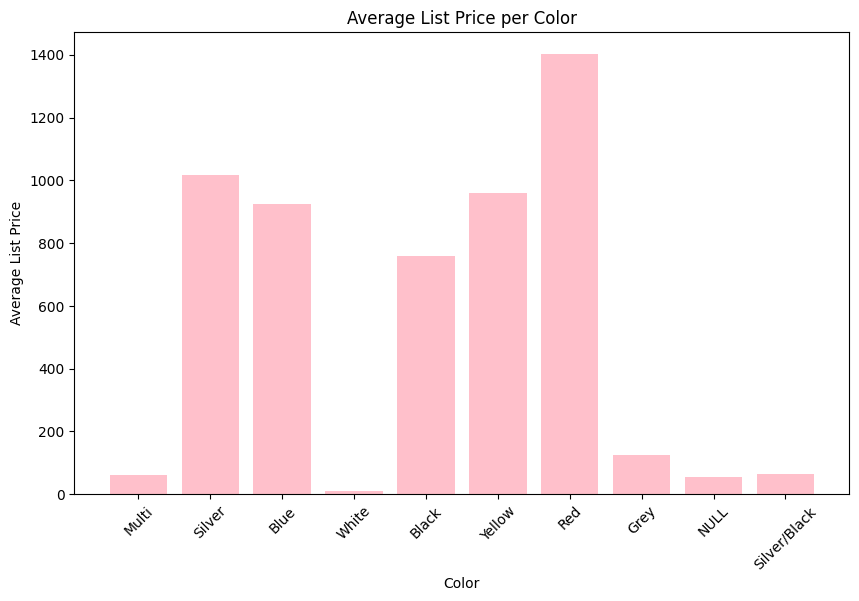

In [122]:
plt.figure(figsize=(10, 6))
plt.bar(avg_price_color_df['Color'], avg_price_color_df['AvgListPriceByColor'], color='pink')
plt.title('Average List Price per Color')
plt.xlabel('Color')
plt.ylabel('Average List Price')
plt.xticks(rotation=45)
plt.show()

The red color has the highest average list price, followed by silver and yellow.
White color has the lowest average price, and there are a few NULL values in the dataset.


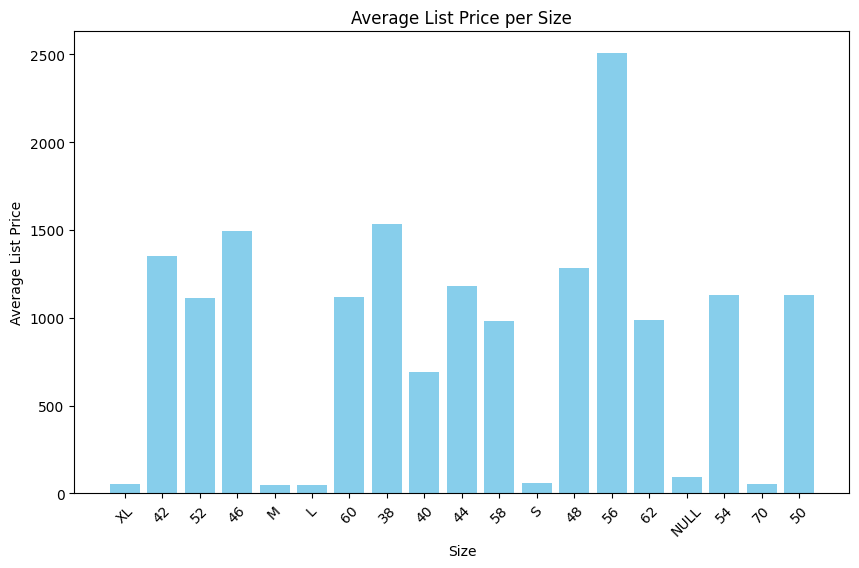

In [123]:
plt.figure(figsize=(10, 6))
plt.bar(avg_price_size_df['Size'], avg_price_size_df['AvgListPriceBySize'], color='skyblue')
plt.title('Average List Price per Size')
plt.xlabel('Size')
plt.ylabel('Average List Price')
plt.xticks(rotation=45)
plt.show()

Size 56 has the highest average list price, followed by sizes 38 and 46.

Sizes XL, M, L, and 70 show the lowest average prices. Some NULL values are present as well.

#### 6. Visualize Total Count per Size. Discuss/Explain your results.

In [124]:
size_count_data = df.groupBy("Size").count().withColumnRenamed("count", "TotalCountBySize")
size_count_df = size_count_data.toPandas()

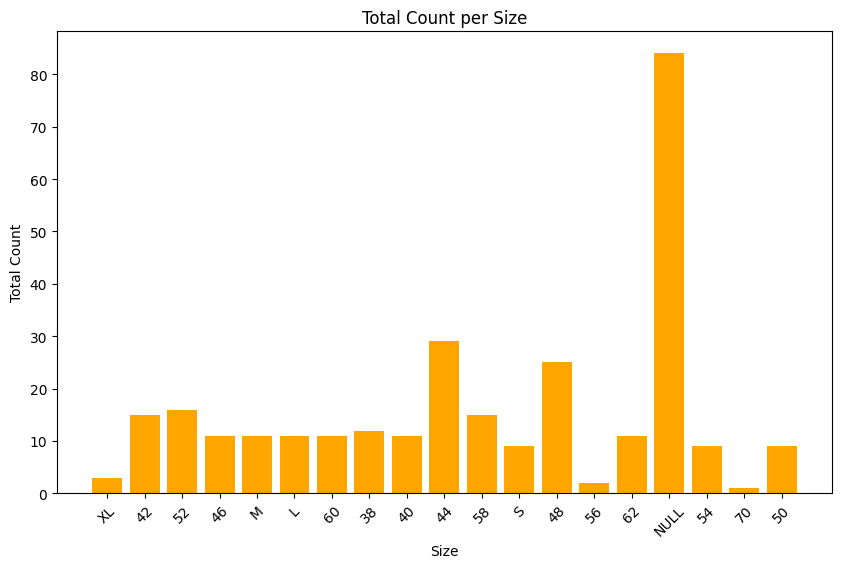

In [125]:
plt.figure(figsize=(10, 6))
plt.bar(size_count_df['Size'], size_count_df['TotalCountBySize'], color='orange')
plt.title('Total Count per Size')
plt.xlabel('Size')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

The highest count is observed for NULL values, indicating that the dataset requires cleaning. Sizes 46, M, L, 60, 40, and 62 show similar counts, while size 70 has the lowest count.

# Using Machine Learning Library (For Practice)

In [126]:
dfall = df.select(df.Weight.cast("float"), df.Size.cast("float"), df.ListPrice.cast("float"))
dfall.show(5, truncate=False)

+-------+----+---------+
|Weight |Size|ListPrice|
+-------+----+---------+
|1016.04|58.0|1431.5   |
|1016.04|58.0|1431.5   |
|NULL   |NULL|34.99    |
|NULL   |NULL|34.99    |
|NULL   |NULL|9.5      |
+-------+----+---------+
only showing top 5 rows



In [127]:
dfall = dfall.na.drop("any")

In [128]:
feature_columns = dfall.columns[:-1] # here we omit the final column for prediction
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns,outputCol="features")

In [129]:
data_2 = assembler.transform(dfall)

In [130]:
data_2.show()

+-------+----+---------+--------------------+
| Weight|Size|ListPrice|            features|
+-------+----+---------+--------------------+
|1016.04|58.0|   1431.5|[1016.03997802734...|
|1016.04|58.0|   1431.5|[1016.03997802734...|
|1043.26|62.0|   1431.5|[1043.26000976562...|
| 961.61|44.0|   1431.5|[961.609985351562...|
| 979.75|48.0|   1431.5|       [979.75,48.0]|
|  997.9|52.0|   1431.5|[997.900024414062...|
|1016.04|56.0|   1431.5|[1016.03997802734...|
|1115.83|58.0|   337.22|[1115.82995605468...|
| 1124.9|60.0|   337.22|[1124.90002441406...|
|1133.98|62.0|   337.22|[1133.97998046875...|
|1052.33|44.0|   337.22|[1052.32995605468...|
|1070.47|48.0|   337.22|[1070.46997070312...|
|1088.62|52.0|   337.22|[1088.61999511718...|
|1115.83|58.0|   337.22|[1115.82995605468...|
| 1124.9|60.0|   337.22|[1124.90002441406...|
|1133.98|62.0|   337.22|[1133.97998046875...|
|1006.97|44.0|   594.83|[1006.96997070312...|
|1025.11|48.0|   594.83|[1025.10998535156...|
|1043.26|52.0|   594.83|[1043.2600

In [131]:
from pyspark.ml.regression import LinearRegression

In [132]:
algo = LinearRegression(featuresCol="features", labelCol="ListPrice")

In [133]:
model = algo.fit(data_2)

In [134]:
evaluation_summary = model.evaluate(data_2)

In [135]:
evaluation_summary.rootMeanSquaredError

862.8415344138203

In [136]:
evaluation_summary.r2

0.10019389704278814